## Ejercicio Final Módulo 3

Importamos las librerias necesarias para la elaboración del ejercicio

In [4]:

# Tratamiento de datos
import pandas as pd
import numpy as np 

#Personalizadas
import funciones as func

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables

import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Stilos de los gráficos.

plt.style.use('seaborn-v0_8-notebook')
# plt.style.available --> Saca el listado de los estilos disponibles.

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Leemos los csv y almacenamos los datos en dos dataframes:

In [5]:
url1_data_customer_flight="https://raw.githubusercontent.com/spinelf/Promo-H-DA-modulo3-evaluacion-final-SilviaPinel/main/Customer%20Flight%20Activity.csv"
url2_data_customer_loyalty="https://raw.githubusercontent.com/spinelf/Promo-H-DA-modulo3-evaluacion-final-SilviaPinel/main/Customer%20Loyalty%20History.csv"

#Accedemos a los datos de los csv que están en el repositorio y ponemos como campo indice Loyalty Number.

data_customer_vuelos = func.cargar_csv(url1_data_customer_flight)
data_customer_fidelidad = func.cargar_csv(url2_data_customer_loyalty)



### Fase 1: Exploración y Limpieza

1. Exploración Inicial:

    - Realiza una exploración inicial de los datos para identificar posibles problemas,como valores nulos, atípicos o datos  
      faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y  
      estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:

    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la  
      adecuación de los datos para el
      análisis estadístico.

In [6]:
#Vemos una representación de como es el Dataframen Vuelos
data_customer_vuelos.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [7]:
#Analizamos las columnas del Dataframe Vuelos
data_customer_vuelos.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
for column in data_customer_vuelos.columns:
  
    print(f"Columna: {column}")
    print(data_customer_vuelos[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]

--------------------

Columna: Year
[2017 2018]

--------------------

Columna: Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]

--------------------

Columna: Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

--------------------

Columna: Flights with Companions
[ 0  4  7  1  6  3  5  2 10  8  9 11]

--------------------

Columna: Total Flights
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

--------------------

Columna: Distance
[1521 2030 1200 ... 1217  617 4135]

--------------------

Columna: Points Accumulated
[152.   203.   120.   ...  18.75 601.   626.  ]

--------------------

Columna: Points Redeemed
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 31

In [9]:
#Vemos una representación de como es el Dataframen Fidelidad
data_customer_fidelidad.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [10]:
#Analizamos las columnas del Dataframe Vuelos

data_customer_fidelidad.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [11]:
for column in data_customer_fidelidad.columns:
  
    print(f"Columna: {column}")
    print(data_customer_fidelidad[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[480934 549612 429460 ... 776187 906428 652627]

--------------------

Columna: Country
['Canada']

--------------------

Columna: Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

--------------------

Columna: City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

--------------------

Columna: Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9'

In [12]:
# Vemos el porcentaje de nulos

# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
porc_nulos = (data_customer_vuelos.isnull().sum() / data_customer_vuelos.shape[0]) * 100
porc_nulos

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [13]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
porc_nulos = (data_customer_fidelidad.isnull().sum() / data_customer_fidelidad.shape[0]) * 100
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [14]:
#Vemos las distintas caracteristicas del DataFrame Vuelos

func.propiedades(data_customer_vuelos)

El Dataframe de tiene 405624 filas y 10 columnas
**************************************
Los duplicados que tenemos en el conjunto de datos son: 1864
**************************************
Los valores nulos que tenemos en el conjunto de datos son: Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64
El Dataframe tiene los siguientes datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month            

None

**************************************
Los valores estadisticos son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


**************************************


In [15]:
#Vemos las distintas caracteristicas del DataFrame Fidelidad

func.propiedades(data_customer_fidelidad)

El Dataframe de tiene 16737 filas y 16 columnas
**************************************
Los duplicados que tenemos en el conjunto de datos son: 0
**************************************
Los valores nulos que tenemos en el conjunto de datos son: Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64
El Dataframe tiene los siguientes datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  

None

**************************************
Los valores estadisticos son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


**************************************


In [16]:
func.quitar_duplicados(data_customer_vuelos)

Ya no quedan mas duplicados: 0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [17]:
#Vemos el tamaño del DataFrame después de quitar los duplicados.

data_customer_vuelos.shape


(403760, 10)

In [18]:
#La columna Country no aporta información ya que todos los clientes son de Canada. La eliminamos.

data_customer_fidelidad.drop(columns = 'Country', inplace = True)

In [19]:
data_customer_fidelidad.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [20]:
#Analizamos las columnas Cancellation Year y Cancellation Month que tienen valores NaN

data_customer_fidelidad["Cancellation Year"].values

array([  nan,   nan, 2018., ...,   nan,   nan, 2016.])

In [21]:
data_customer_fidelidad["Cancellation Year"].unique

<bound method Series.unique of 0           NaN
1           NaN
2        2018.0
3           NaN
4           NaN
          ...  
16732       NaN
16733       NaN
16734       NaN
16735       NaN
16736    2016.0
Name: Cancellation Year, Length: 16737, dtype: float64>

In [22]:
data_customer_fidelidad['Cancellation Month'].values

array([nan, nan,  1., ..., nan, nan,  8.])

In [23]:
data_customer_fidelidad["Cancellation Month"].unique

<bound method Series.unique of 0        NaN
1        NaN
2        1.0
3        NaN
4        NaN
        ... 
16732    NaN
16733    NaN
16734    NaN
16735    NaN
16736    8.0
Name: Cancellation Month, Length: 16737, dtype: float64>

In [24]:
data_customer_fidelidad["Salary"].unique

<bound method Series.unique of 0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64>

In [25]:
#Vamos a cambiar en el caso del salario los NaN por la media de salarios.

# calculamos la moda para la columna
media = data_customer_fidelidad["Salary"].mean() 

#Reemplazamos los valores NaN por la media

data_customer_fidelidad["Salary"] = data_customer_fidelidad["Salary"].fillna(media)

#Comprobamos que ya no hay valores nulos.

data_customer_fidelidad["Salary"].isnull().sum()

0

In [26]:
data_customer_fidelidad["Salary"].unique

<bound method Series.unique of 0         83236.000000
1         79245.609409
2         79245.609409
3         79245.609409
4        103495.000000
             ...      
16732     79245.609409
16733     89210.000000
16734     79245.609409
16735    -57297.000000
16736     75049.000000
Name: Salary, Length: 16737, dtype: float64>

In [27]:
#Quitamos los valores negativos de salario y los pasamos a positivos calculando el valor absoluto.

data_customer_fidelidad['Salary'] = data_customer_fidelidad['Salary'].abs()

In [28]:
#Comprobamos que no nos queda ningun valor negativo.

data_customer_fidelidad[data_customer_fidelidad["Salary"]<0]

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [29]:
#Hacemos un left merge para añadir a df
df_customers_total=pd.merge(data_customer_vuelos, data_customer_fidelidad, on='Loyalty Number', how='left')

In [30]:
df_customers_total

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79245.609409,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,British Columbia,Victoria,V10 6T5,Male,College,79245.609409,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [31]:
#Vemos como queda el DataFrame por si tenemos que hacer algo más:

func.propiedades(df_customers_total)

El Dataframe de tiene 403760 filas y 24 columnas
**************************************
Los duplicados que tenemos en el conjunto de datos son: 0
**************************************
Los valores nulos que tenemos en el conjunto de datos son: Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                   

None

**************************************
Los valores estadisticos son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.000000,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.000000,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.000000,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.000000,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.000000,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.000000,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.000000,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.000000,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.000000,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.000000,0.00,71.00


**************************************


In [32]:
#Vamos a analizar el cambiar los datos de las columnas
display(pd.DataFrame(df_customers_total.dtypes, columns = ["tipo_dato"]))

#En este caso podriamos:
#  - Convertir el Loyaly number en String ya que no vamos a realizar operaciones matemáticas con el.
#  - Convertir Points Redeemed y Dollar Cost Points Redeemed en float64 ya que los puntos acumulados pueden ser float64.
#  - Convertir Cancellation Month y Cancellation Year en int64. Pondremos 0 en los casos de nulos ya que no habra 
#    ni año ni mes de cancelación.

,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64


In [33]:
# Cambiamos a string Loyalty Number y lo convertimos en Indice.

func.conversion_tipos(df_customers_total,"Loyalty Number","str")




0         100018
1         100102
2         100140
3         100214
4         100272
           ...  
403755    999902
403756    999911
403757    999940
403758    999982
403759    999986
Name: Loyalty Number, Length: 403760, dtype: object

In [34]:
# Convertir Points Redeemed y Dollar Cost Points Redeemed en float64 ya que los puntos acumulados pueden ser float64.

func.conversion_tipos(df_customers_total,"Points Redeemed","float64")

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
403755    0.0
403756    0.0
403757    0.0
403758    0.0
403759    0.0
Name: Points Redeemed, Length: 403760, dtype: float64

In [35]:
func.conversion_tipos(df_customers_total,"Dollar Cost Points Redeemed","float64")

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
403755    0.0
403756    0.0
403757    0.0
403758    0.0
403759    0.0
Name: Dollar Cost Points Redeemed, Length: 403760, dtype: float64

In [36]:
#  - Convertir Enrollment Month	 y Cancellation Year en int64. Pondremos 0 en los casos de nulos ya que no habra 
#    ni año ni mes de cancelación.

# Cambiamos  los valores NaN por 0 para poder luego realizar la conversión.

func.cambiar_valores_NaN(df_customers_total,"Cancellation Year")
func.cambiar_valores_NaN(df_customers_total,"Cancellation Month")


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0.0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0.0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Single,Nova,2887.74,Standard,2013,3,0.0,0.0
2,100140,2017,1,6,0,6,1200,120.0,0.0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79245.609409,Divorced,Nova,2838.07,Standard,2016,7,0.0,0.0
3,100214,2017,1,0,0,0,0,0.0,0.0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,0.0,0.0
4,100272,2017,1,0,0,0,0,0.0,0.0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0.0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Married,Aurora,7290.07,Standard,2014,5,0.0,0.0
403756,999911,2018,12,0,0,0,0,0.0,0.0,0.0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8,0.0,0.0
403757,999940,2018,12,3,0,3,1233,123.0,0.0,0.0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7,0.0,0.0
403758,999982,2018,12,0,0,0,0,0.0,0.0,0.0,British Columbia,Victoria,V10 6T5,Male,College,79245.609409,Married,Star,2631.56,Standard,2018,7,0.0,0.0


In [37]:
func.cambiar_valores_NaN(df_customers_total,"Cancellation Month")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0.0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,0.0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0.0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Single,Nova,2887.74,Standard,2013,3,0.0,0.0
2,100140,2017,1,6,0,6,1200,120.0,0.0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79245.609409,Divorced,Nova,2838.07,Standard,2016,7,0.0,0.0
3,100214,2017,1,0,0,0,0,0.0,0.0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,0.0,0.0
4,100272,2017,1,0,0,0,0,0.0,0.0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0.0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79245.609409,Married,Aurora,7290.07,Standard,2014,5,0.0,0.0
403756,999911,2018,12,0,0,0,0,0.0,0.0,0.0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8,0.0,0.0
403757,999940,2018,12,3,0,3,1233,123.0,0.0,0.0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7,0.0,0.0
403758,999982,2018,12,0,0,0,0,0.0,0.0,0.0,British Columbia,Victoria,V10 6T5,Male,College,79245.609409,Married,Star,2631.56,Standard,2018,7,0.0,0.0


In [38]:
func.conversion_tipos(df_customers_total,"Cancellation Month","int64")


0         0
1         0
2         0
3         0
4         0
         ..
403755    0
403756    0
403757    0
403758    0
403759    0
Name: Cancellation Month, Length: 403760, dtype: int64

In [39]:
func.conversion_tipos(df_customers_total,"Cancellation Year","int64")

0         0
1         0
2         0
3         0
4         0
         ..
403755    0
403756    0
403757    0
403758    0
403759    0
Name: Cancellation Year, Length: 403760, dtype: int64

In [40]:
#Comprobamos que no hay nulos.

df_customers_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  object 
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  float64
 9   Dollar Cost Points Redeemed  403760 non-null  float64
 10  Province                     403760 non-null  object 
 11  City                         403760 non-null  object 
 12  Postal Code                  403760 non-null  object 
 13 

### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las
siguientes gráficas usando la mejor gráfica que consideres:

3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [41]:
vuelos_x_mes =df_customers_total.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

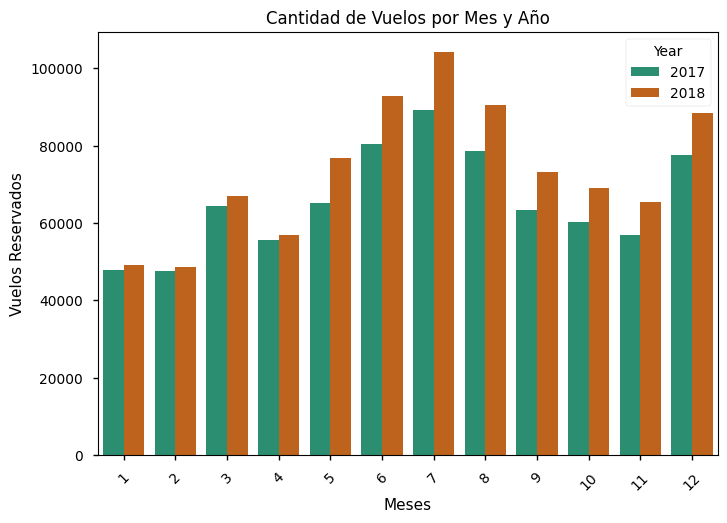

In [42]:
colores = "Dark2"
sns.barplot(data=vuelos_x_mes,
            x='Month', 
            y='Flights Booked', 
            hue='Year',
            palette=colores,
            );
plt.xlabel("Meses")
plt.ylabel("Vuelos Reservados")
plt.title("Cantidad de Vuelos por Mes y Año")
plt.xticks(rotation=45);

En la gráfica podemos ver como se distribuyen los vuelos por los meses del año, destacan los periodos vacaciones como puede ser Junio, Julio, Agosto y Navidades (Diciembre).

4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

Como son dos variables numéricas (cuantitativas) utilizaremos un gráfico de dispersión:

        sns.scatterplot(x, y, data, hue, style, size)

            x e y las variables que vamos a comparar.

            hue agrupa los datos en función de una variable categórica.

            size Varia el tamaño de los puntos en función de una variable cuantitativa.

            style Cambia la forma de los puntos en función de una variable categórica.

            palette Especifica la paleta de colores a usar cuando se emplea el parámetro hue.

In [43]:
distancia_con_puntos =df_customers_total.groupby(['Distance'])['Points Accumulated'].sum().reset_index()

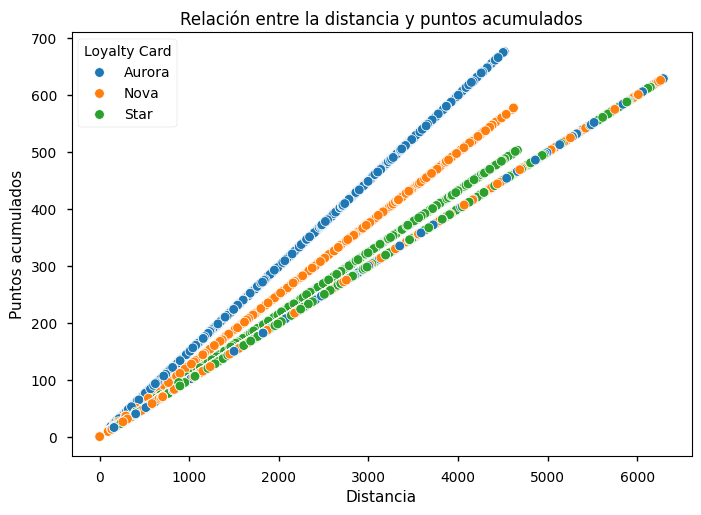

In [44]:

sns.scatterplot(x = "Distance", 
            y = "Points Accumulated",
            hue = "Loyalty Card", 
            data = df_customers_total,
            alpha=1  # Ajusta la transparencia de los puntos
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")

# ponemos título a la gráfica
plt.title("Relación entre la distancia y puntos acumulados");

5. ¿Cuál es la distribución de los clientes por provincia o estado?

In [45]:
df_dis_clientes= df_customers_total.groupby('Province')['Loyalty Number'].count().reset_index()
display(df_dis_clientes)

,Province,Loyalty Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


Vemos que las provincias que más clientes tienen son Ontario, British Columbia y Quebec.

Ahora lo mostramos graficamente:

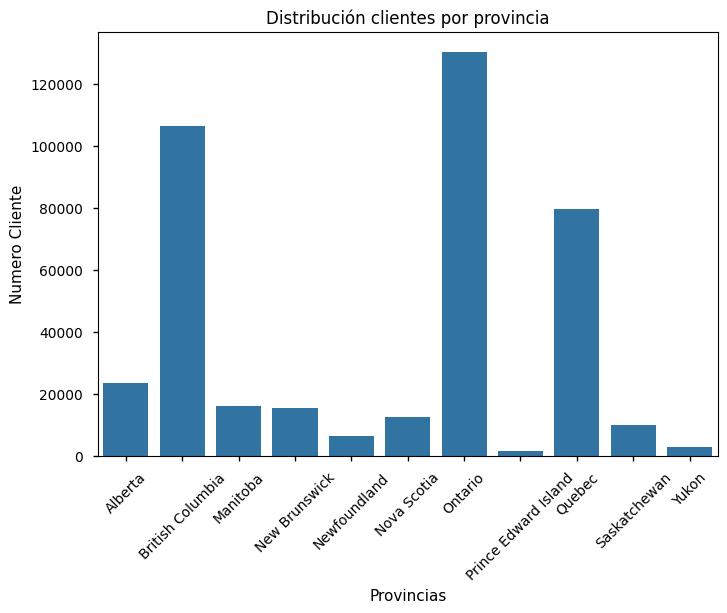

In [46]:

sns.barplot(data=df_dis_clientes,
            x='Province', 
            y='Loyalty Number', 
            );
plt.xlabel("Provincias")
plt.ylabel("Numero Cliente")
plt.title("Distribución clientes por provincia")
plt.xticks(rotation=45);

6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Vamos a comparar una variable numérica (Salario promedio) y una categorica que son los niveles educativos por lo que utilizaremos un gráfico barplot.

In [47]:
df_salario_educacion= df_customers_total.groupby("Education")["Salary"].mean().reset_index()
display(df_salario_educacion)

,Education,Salary
0,Bachelor,72599.080913
1,College,79245.609409
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [48]:
df_salario_educacion["Education"].values

array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object)

Vemos que los salarios más altos corresponden a los Doctores y a los que tiene Master.

Lo representamos gráficamente:

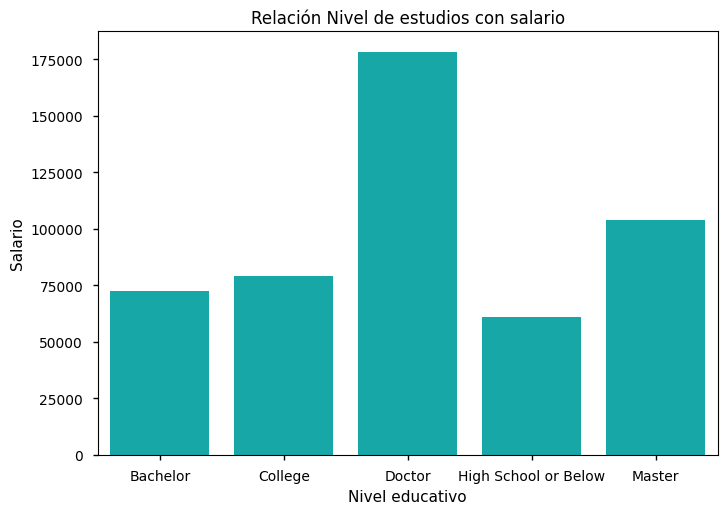

In [49]:
sns.barplot(x = "Education",
            y = "Salary",
            data = df_salario_educacion,
            color = "c", 
            order = ['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'])

# cambiamos los nombres de los ejes
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.title("Relación Nivel de estudios con salario");

7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [50]:
Proporcion_clientes = df_customers_total.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
display(Proporcion_clientes)

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


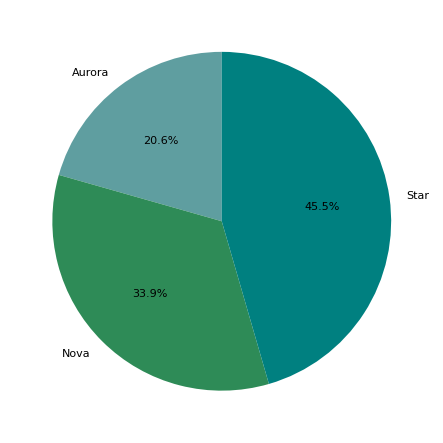

In [51]:
colores = ["cadetblue", "seagreen","teal"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = Proporcion_clientes, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

8. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [52]:
#Hacemos una agrupación por genero y estado civil, agrupado por el número de cliente.

df_estado_genero= df_customers_total.groupby("Loyalty Number")[["Gender", "Marital Status"]].first().reset_index()

In [53]:
# Ahora lo Agrupamos por genero y estado civil y contamos los clientes.

df_por_genero_estado=df_estado_genero[["Gender","Marital Status"]].value_counts()

display(df_por_genero_estado)

Gender  Marital Status
Female  Married           4869
Male    Married           4866
Female  Single            2272
Male    Single            2212
Female  Divorced          1269
Male    Divorced          1249
Name: count, dtype: int64

Vamos a verlo con un gráfico:

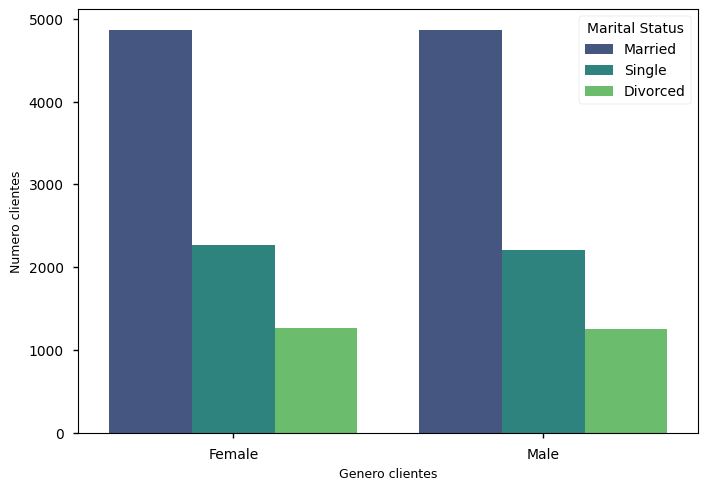

In [54]:
sns.countplot(x = "Gender", 
              data = df_estado_genero, 
              palette = "viridis", 
              hue = "Marital Status")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Genero clientes", fontsize = 9)
plt.ylabel("Numero clientes",  fontsize = 9); 

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio:
  Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

9. Preparación de Datos:

    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [55]:
df_relevantes = df_customers_total[['Flights Booked','Education']]

In [56]:
df_relevantes

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


10. Análisis Descriptivo:

    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [57]:
#Agrupamos los vuelos por nivel de educación y calculamos la media.Este dato nos dira cual es la media de reservas de vuelos por nivel de educacion.

df_relevantes.groupby("Education")['Flights Booked'].mean()

Education
Bachelor                4.110288
College                 4.169744
Doctor                  4.175512
High School or Below    4.176209
Master                  4.200700
Name: Flights Booked, dtype: float64

In [58]:
#Sacamos los detalles estadísticos más importantes agrupados por niveles de educación.

df_relevantes.groupby('Education').describe()

Flights Booked                                          \
                              count      mean       std  min  25%  50%  75%   
Education                                                                     
Bachelor                   252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0   
College                    102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0   
Doctor                      17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0   
High School or Below        18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0   
Master                      12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0   

                            
                       max  
Education                   
Bachelor              21.0  
College               21.0  
Doctor                21.0  
High School or Below  21.0  
Master                21.0

In [59]:
#Calculamos la desviación estandar

df_relevantes.groupby('Education')['Flights Booked'].std()

Education
Bachelor                5.221671
College                 5.246040
Doctor                  5.256971
High School or Below    5.239267
Master                  5.213956
Name: Flights Booked, dtype: float64

Los valores son bastanete similares en todos los grupos.

11. Prueba Estadística:

    - Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Recordemos que tenemos que evaluar si se cumplen los supuestos de: 

- Normalidad

- Homogeneidad de varianzas

- Independecia de las observaciones

In [62]:
#Separamos la información en dos grupos de estudio, gente con estudios superiores y gente con estudios medios.

estudios_superiores = df_relevantes[(df_relevantes['Education'] == 'College') | (df_relevantes['Education'] == 'Doctor')| (df_relevantes['Education'] == 'Master')]
estudios_medios = df_relevantes[(df_relevantes['Education'] == 'High School or Below') | (df_relevantes['Education'] == 'Bachelor')]

In [67]:
estudios_superiores.head(5)

,Flights Booked,Education
1,10,College
2,6,College
14,0,Master
16,11,Master
17,0,College


In [68]:
estudios_medios.head(5)

,Flights Booked,Education
0,3,Bachelor
3,0,Bachelor
4,0,Bachelor
5,0,Bachelor
6,0,Bachelor


# Vamos a estudiar la Normalidad

El test de Shapiro-Wilk se utiliza para evaluar si una muestra de datos sigue una distribución normal. En Python, 
puedes realizar este test utilizando la función `shapiro` de la biblioteca `scipy.stats`

In [73]:
func.normalidad(estudios_superiores,'flights_booked')

AttributeError: module 'funciones' has no attribute 'normalidad'

In [71]:
func.normalidad(estudios_medios,'flights_booked')

AttributeError: module 'funciones' has no attribute 'normalidad'